In [ ]:
import sys

sys.path.append("..")

In [ ]:
from config import config, config_indicators
from preprocessor.findata_downloader import FinancialDataDownloader
from preprocessor.findata_preprocessor import FinancialDataPreprocessor
from visualiser.findata_visualiser import FinancialDataVisualiser

In [ ]:
findownloader = FinancialDataDownloader(config.START_DATE, config.END_DATE)
data = findownloader.load_data("../" + config.DATA_DIR, config.TEST_NAME)

Data loaded from ../data/test.csv


In [ ]:
finpreprocessor = FinancialDataPreprocessor(config.START_DATE, config.END_DATE)
data = finpreprocessor.preprocess(
    data,
    config.EXCHANGE_NYSE,
    config.USE_TECHNICAL_INDICATORS,
    list(config_indicators.TECHNICAL_INDICATORS.keys()),
    config.USE_MACROECONOMIC_INDICATORS,
    list(config_indicators.MACROECONOMIC_INDICATORS.keys()),
)

Data downloaded for 1 tickers from 2016-01-01 to 2025-01-01.


In [ ]:
data.head()

,date,tic,open,high,low,close,volume,day,close_5_sma,close_10_sma,...,kdjk,kdjd,cci,boll,boll_ub,boll_lb,atr,adx,vwma,vix
0,2016-01-04,AAPL,23.184077,23.807681,23.046251,23.803162,270597600.0,0,23.803162,23.803162,...,66.468801,55.489600,0.000000,23.803162,0.000000,0.000000,0.761431,0.000000,23.552365,20.700001
1,2016-01-05,AAPL,23.893540,23.916134,23.138889,23.206671,223164000.0,1,23.504916,23.504916,...,50.459721,53.812974,-66.666667,23.504916,24.348482,22.661351,0.769631,100.000000,23.492795,19.340000
2,2016-01-06,AAPL,22.720895,23.129854,22.564995,22.752527,273829600.0,2,23.254120,23.254120,...,38.266331,48.630759,-100.000000,23.254120,24.307964,22.200276,0.723782,83.581431,23.251282,20.590000
3,2016-01-07,AAPL,22.296116,22.623734,21.787743,21.792261,324377600.0,3,22.888655,22.888655,...,25.581647,40.947722,-114.396013,22.888655,24.584952,21.192359,0.790886,85.561497,22.899753,24.990000
4,2016-01-08,AAPL,22.266749,22.393277,21.862309,21.907497,283192000.0,4,22.692424,22.692424,...,18.929939,33.608461,-84.116407,22.692424,24.403623,20.981224,0.747086,86.498015,22.725658,27.010000


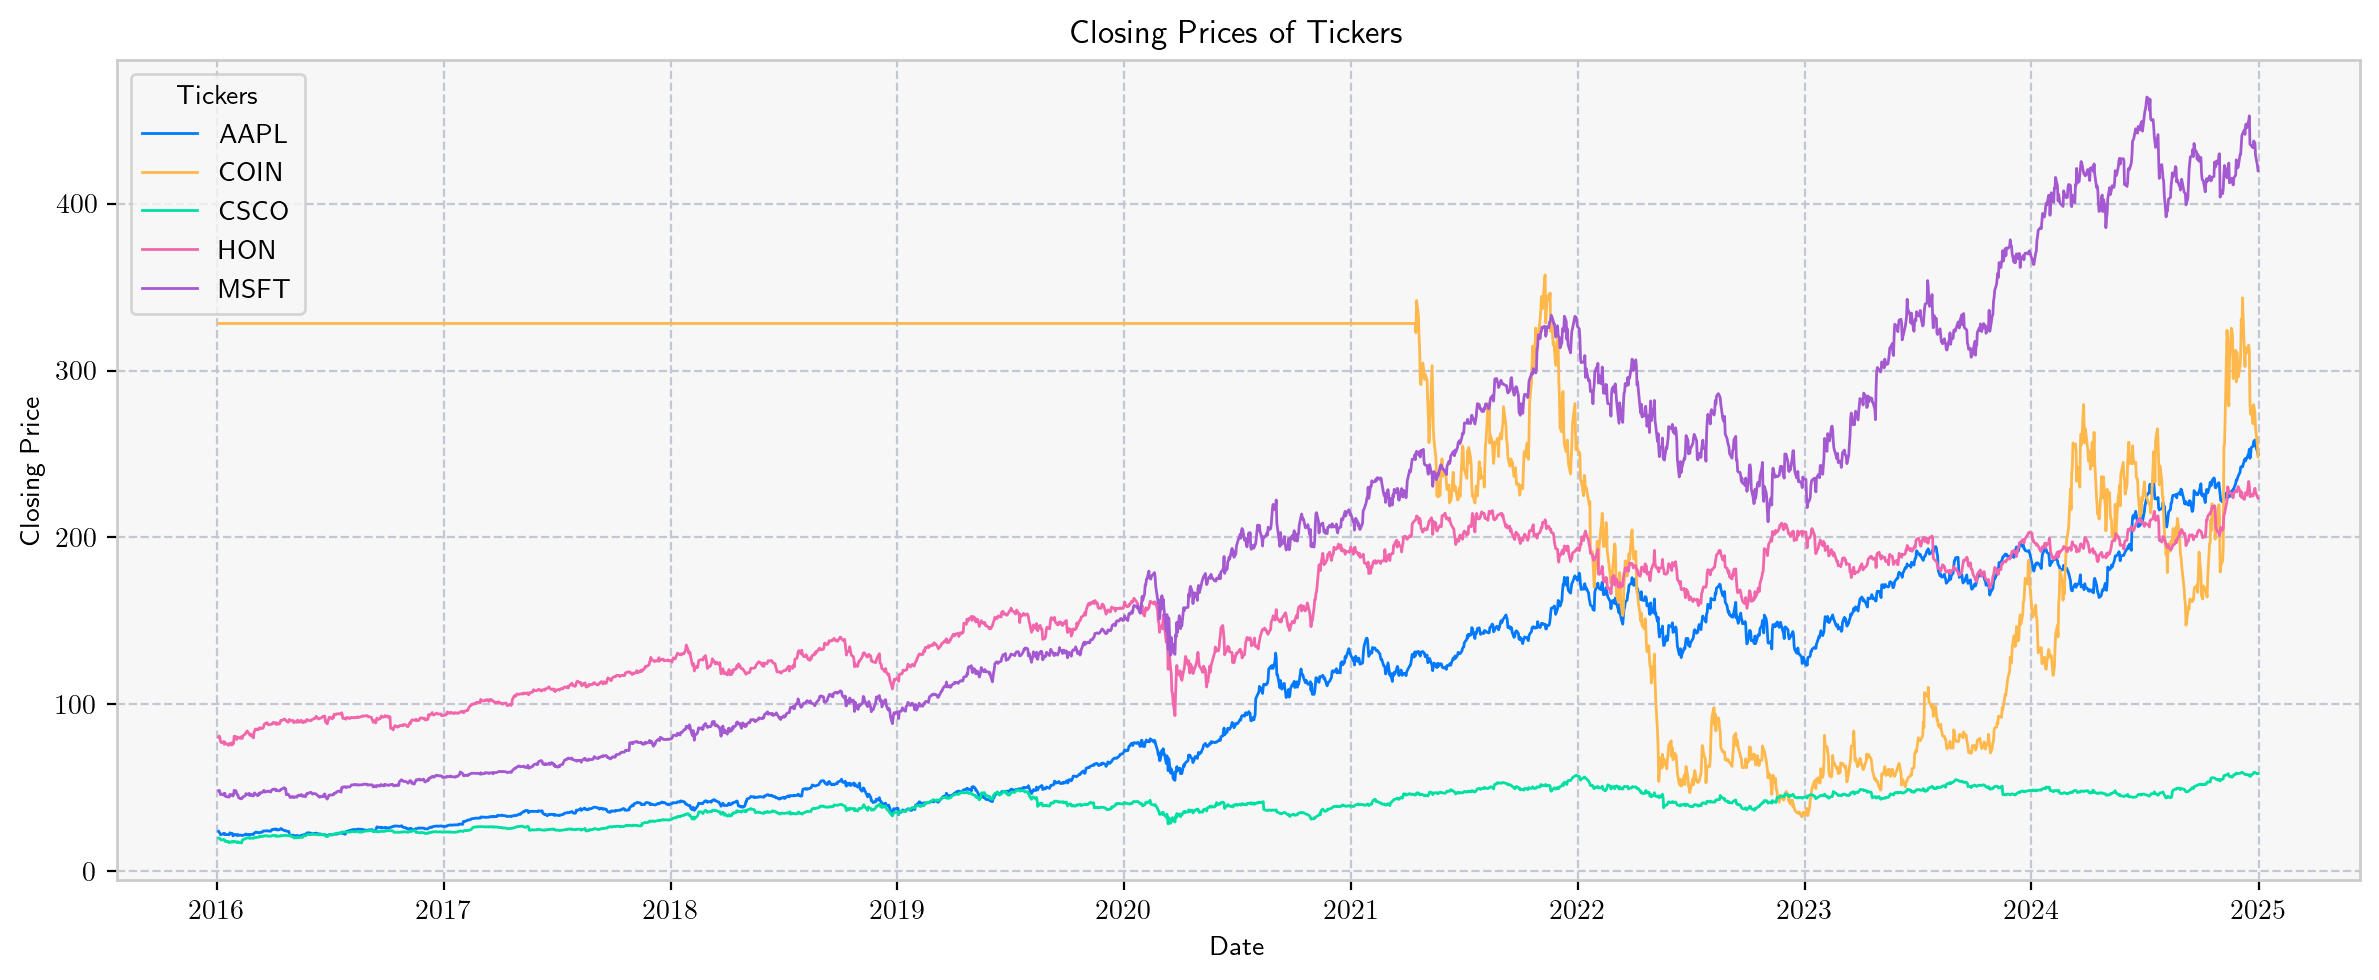

In [ ]:
finvisualiser = FinancialDataVisualiser()
finvisualiser.plot_close_prices(
    data, "../" + config.PLOT_DIR, config.TEST_NAME + "_processed"
)

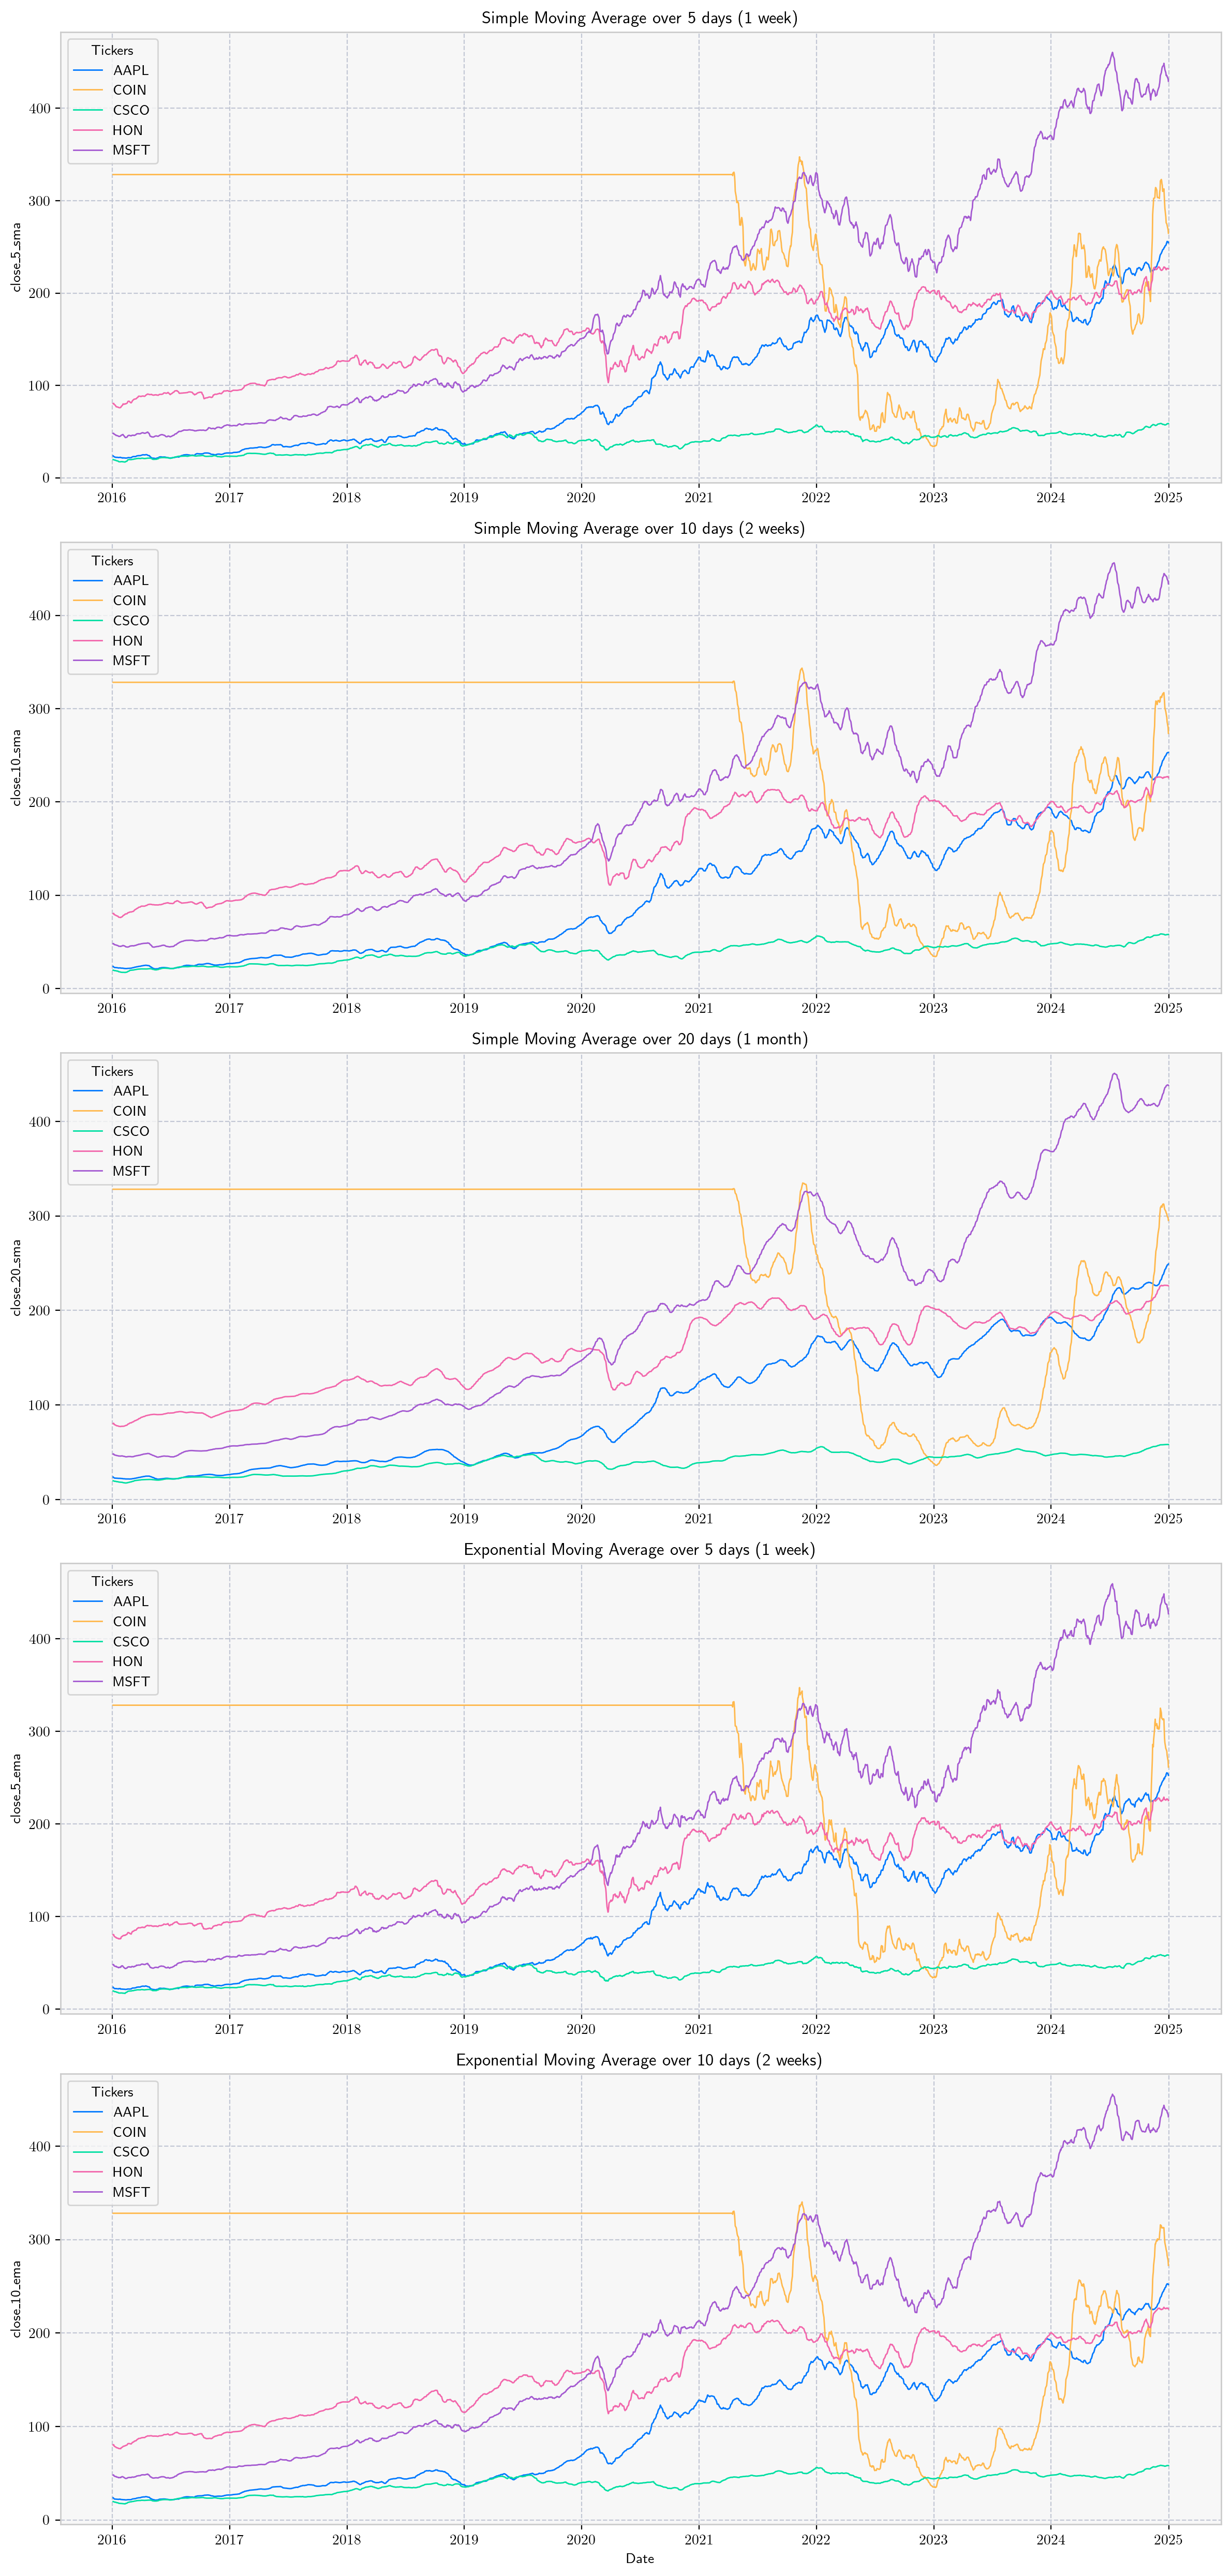

In [ ]:
finvisualiser.plot_technical_indicators(
    data,
    config_indicators.TECHNICAL_INDICATORS,
    "../" + config.PLOT_DIR,
    config.TEST_NAME,
)

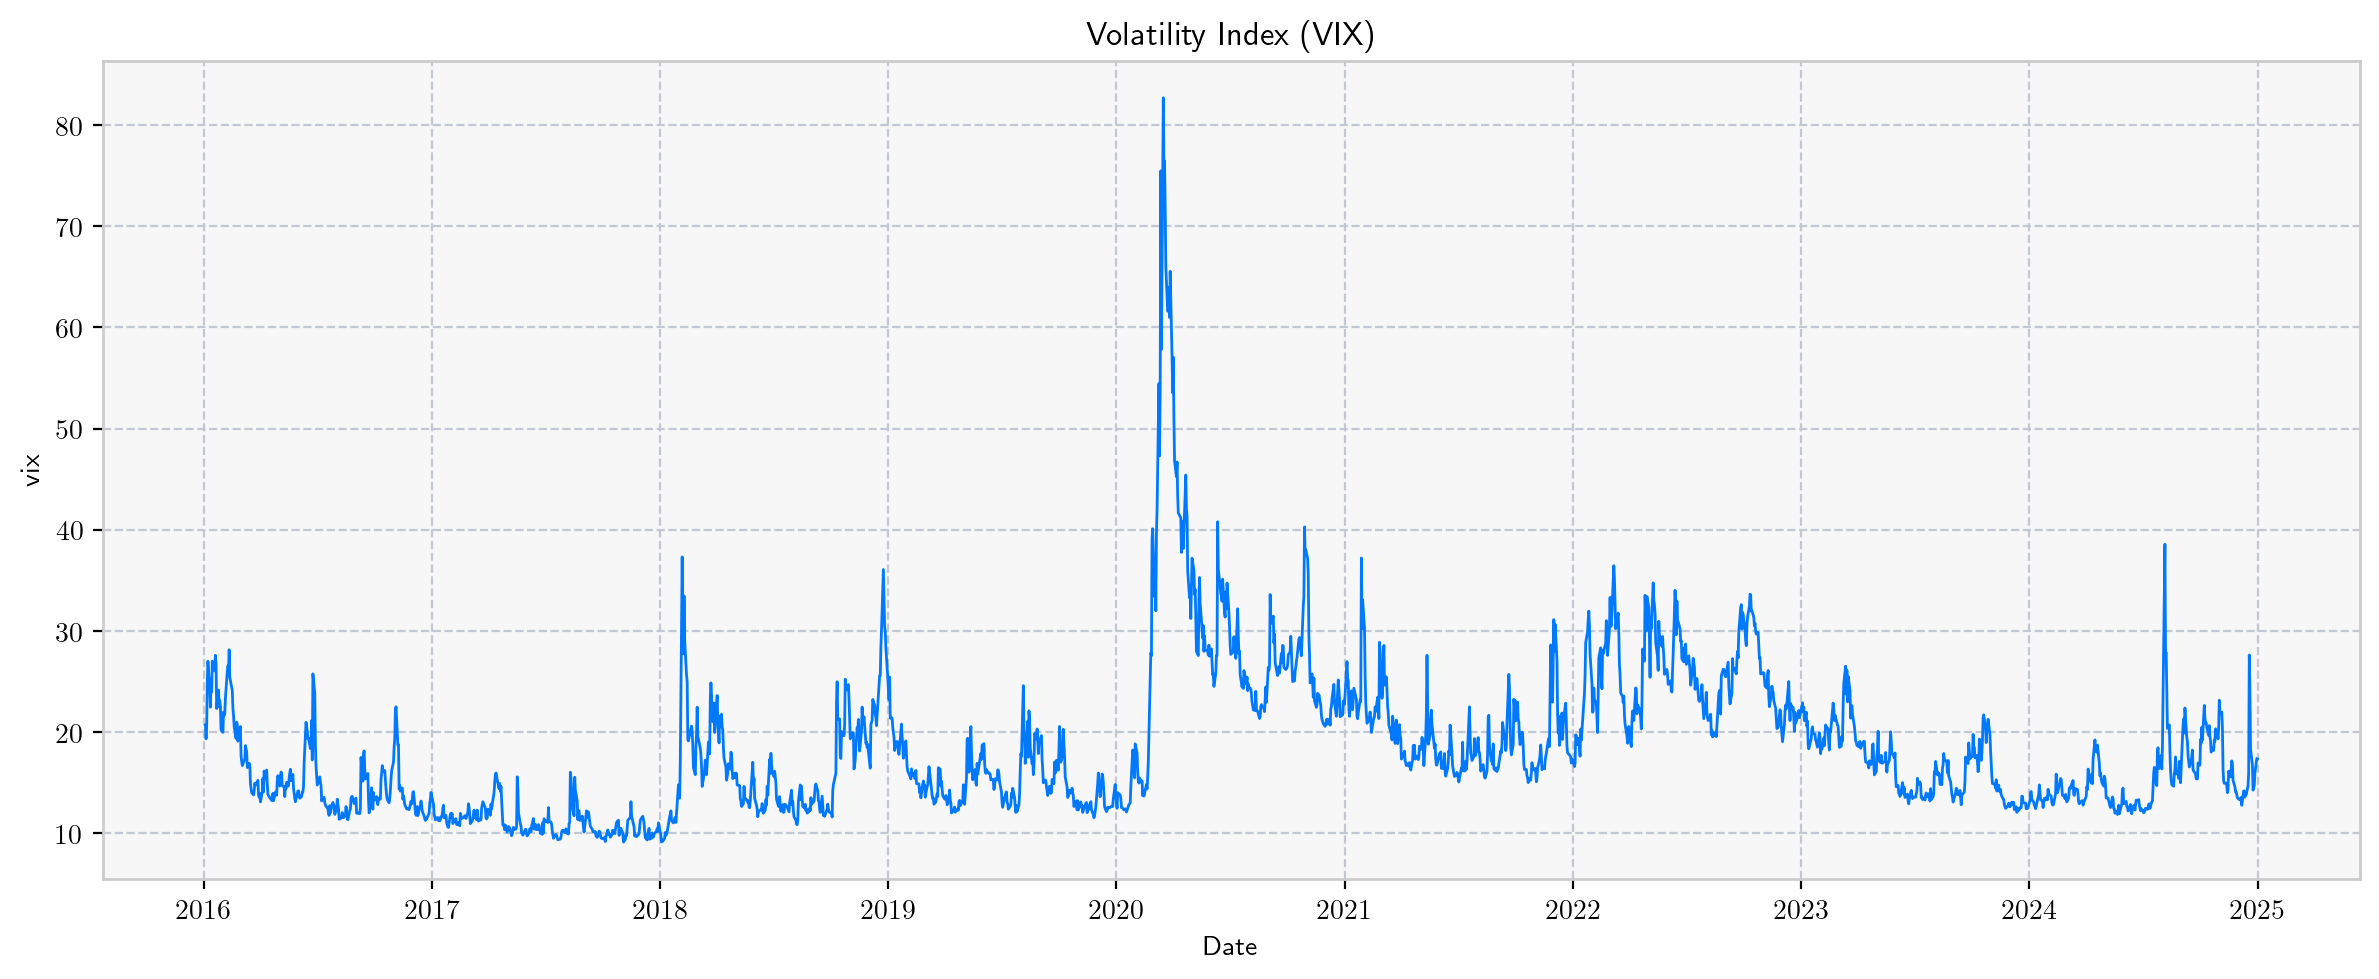

In [ ]:
finvisualiser.plot_macroeconomic_indicators(
    data,
    config_indicators.MACROECONOMIC_INDICATORS,
    "../" + config.PLOT_DIR,
    config.TEST_NAME,
)

In [ ]:
train_data, test_data = finpreprocessor.split_train_test(
    data, config.TRAIN_END_DATE
)

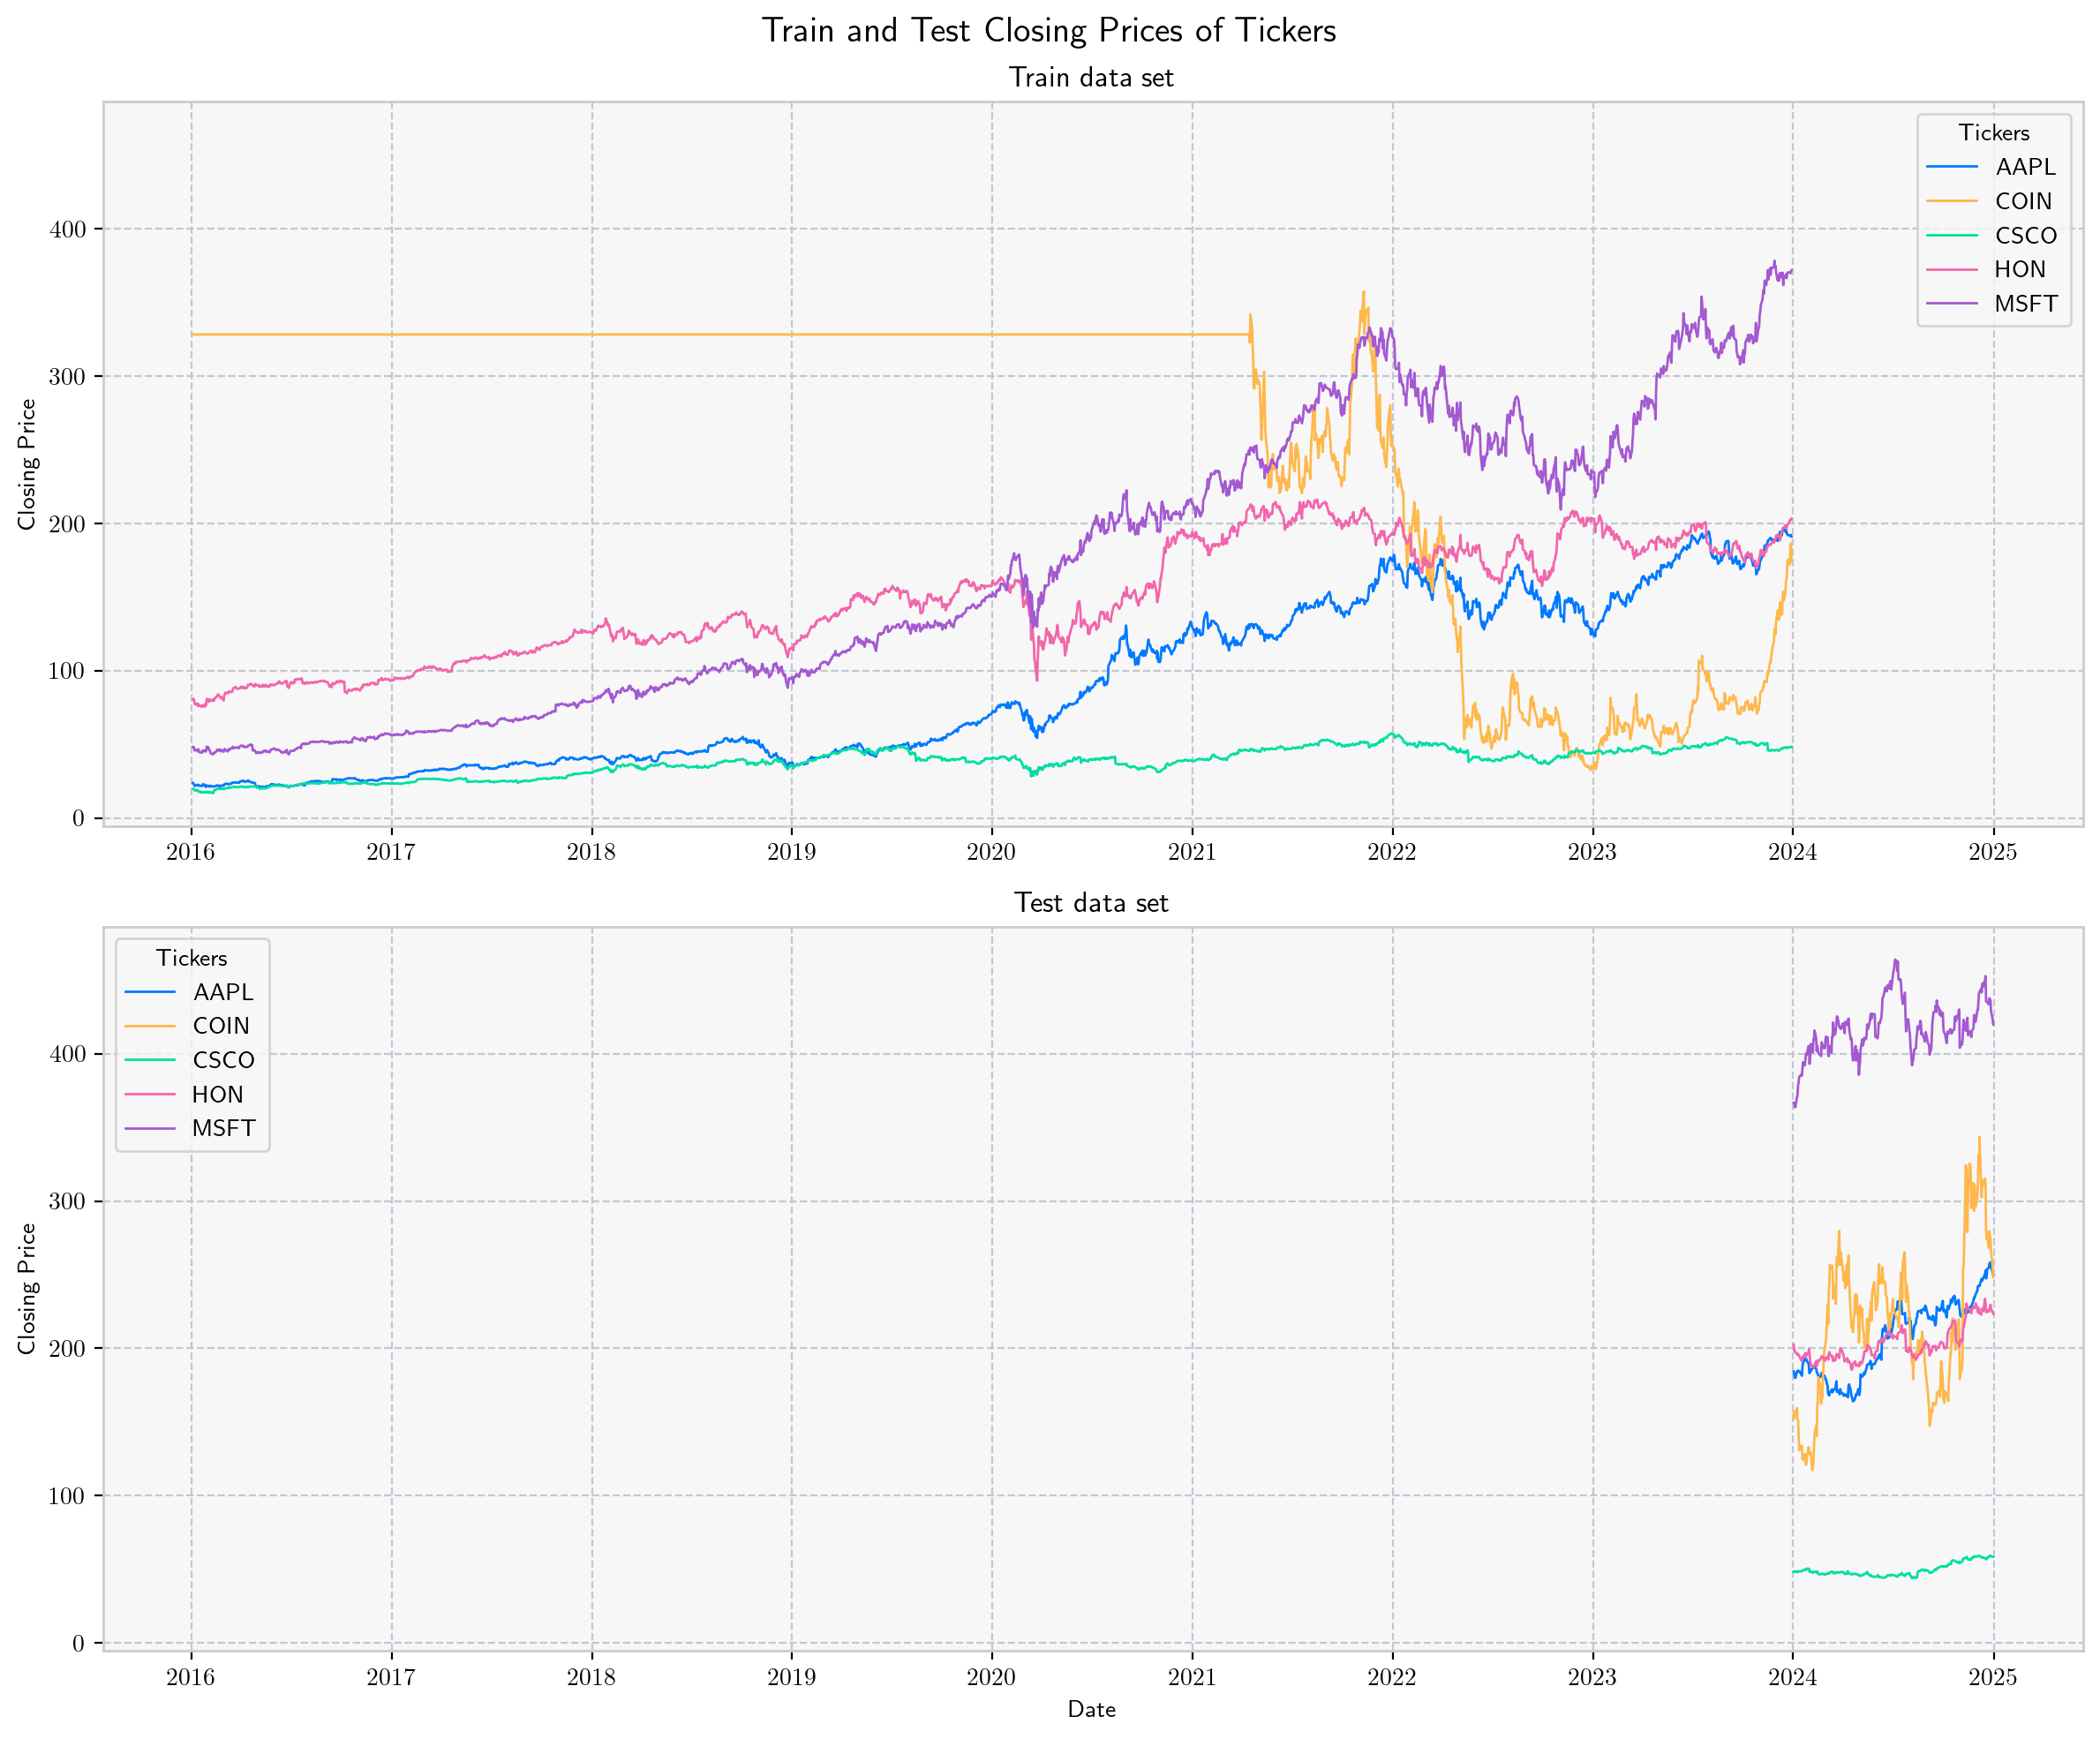

In [ ]:
finvisualiser.plot_train_test_close_prices(
    train_data, test_data, "../" + config.PLOT_DIR, config.TEST_NAME
)

In [ ]:
finpreprocessor.save_train_test_data(
    train_data, test_data, "../" + config.DATA_DIR, config.TEST_NAME
)

Train data saved to ../data/test_train.csv
Test data saved to ../data/test_trade.csv


In [ ]:
train_data, test_data = finpreprocessor.load_train_test_data(
    "../" + config.DATA_DIR, config.TEST_NAME
)

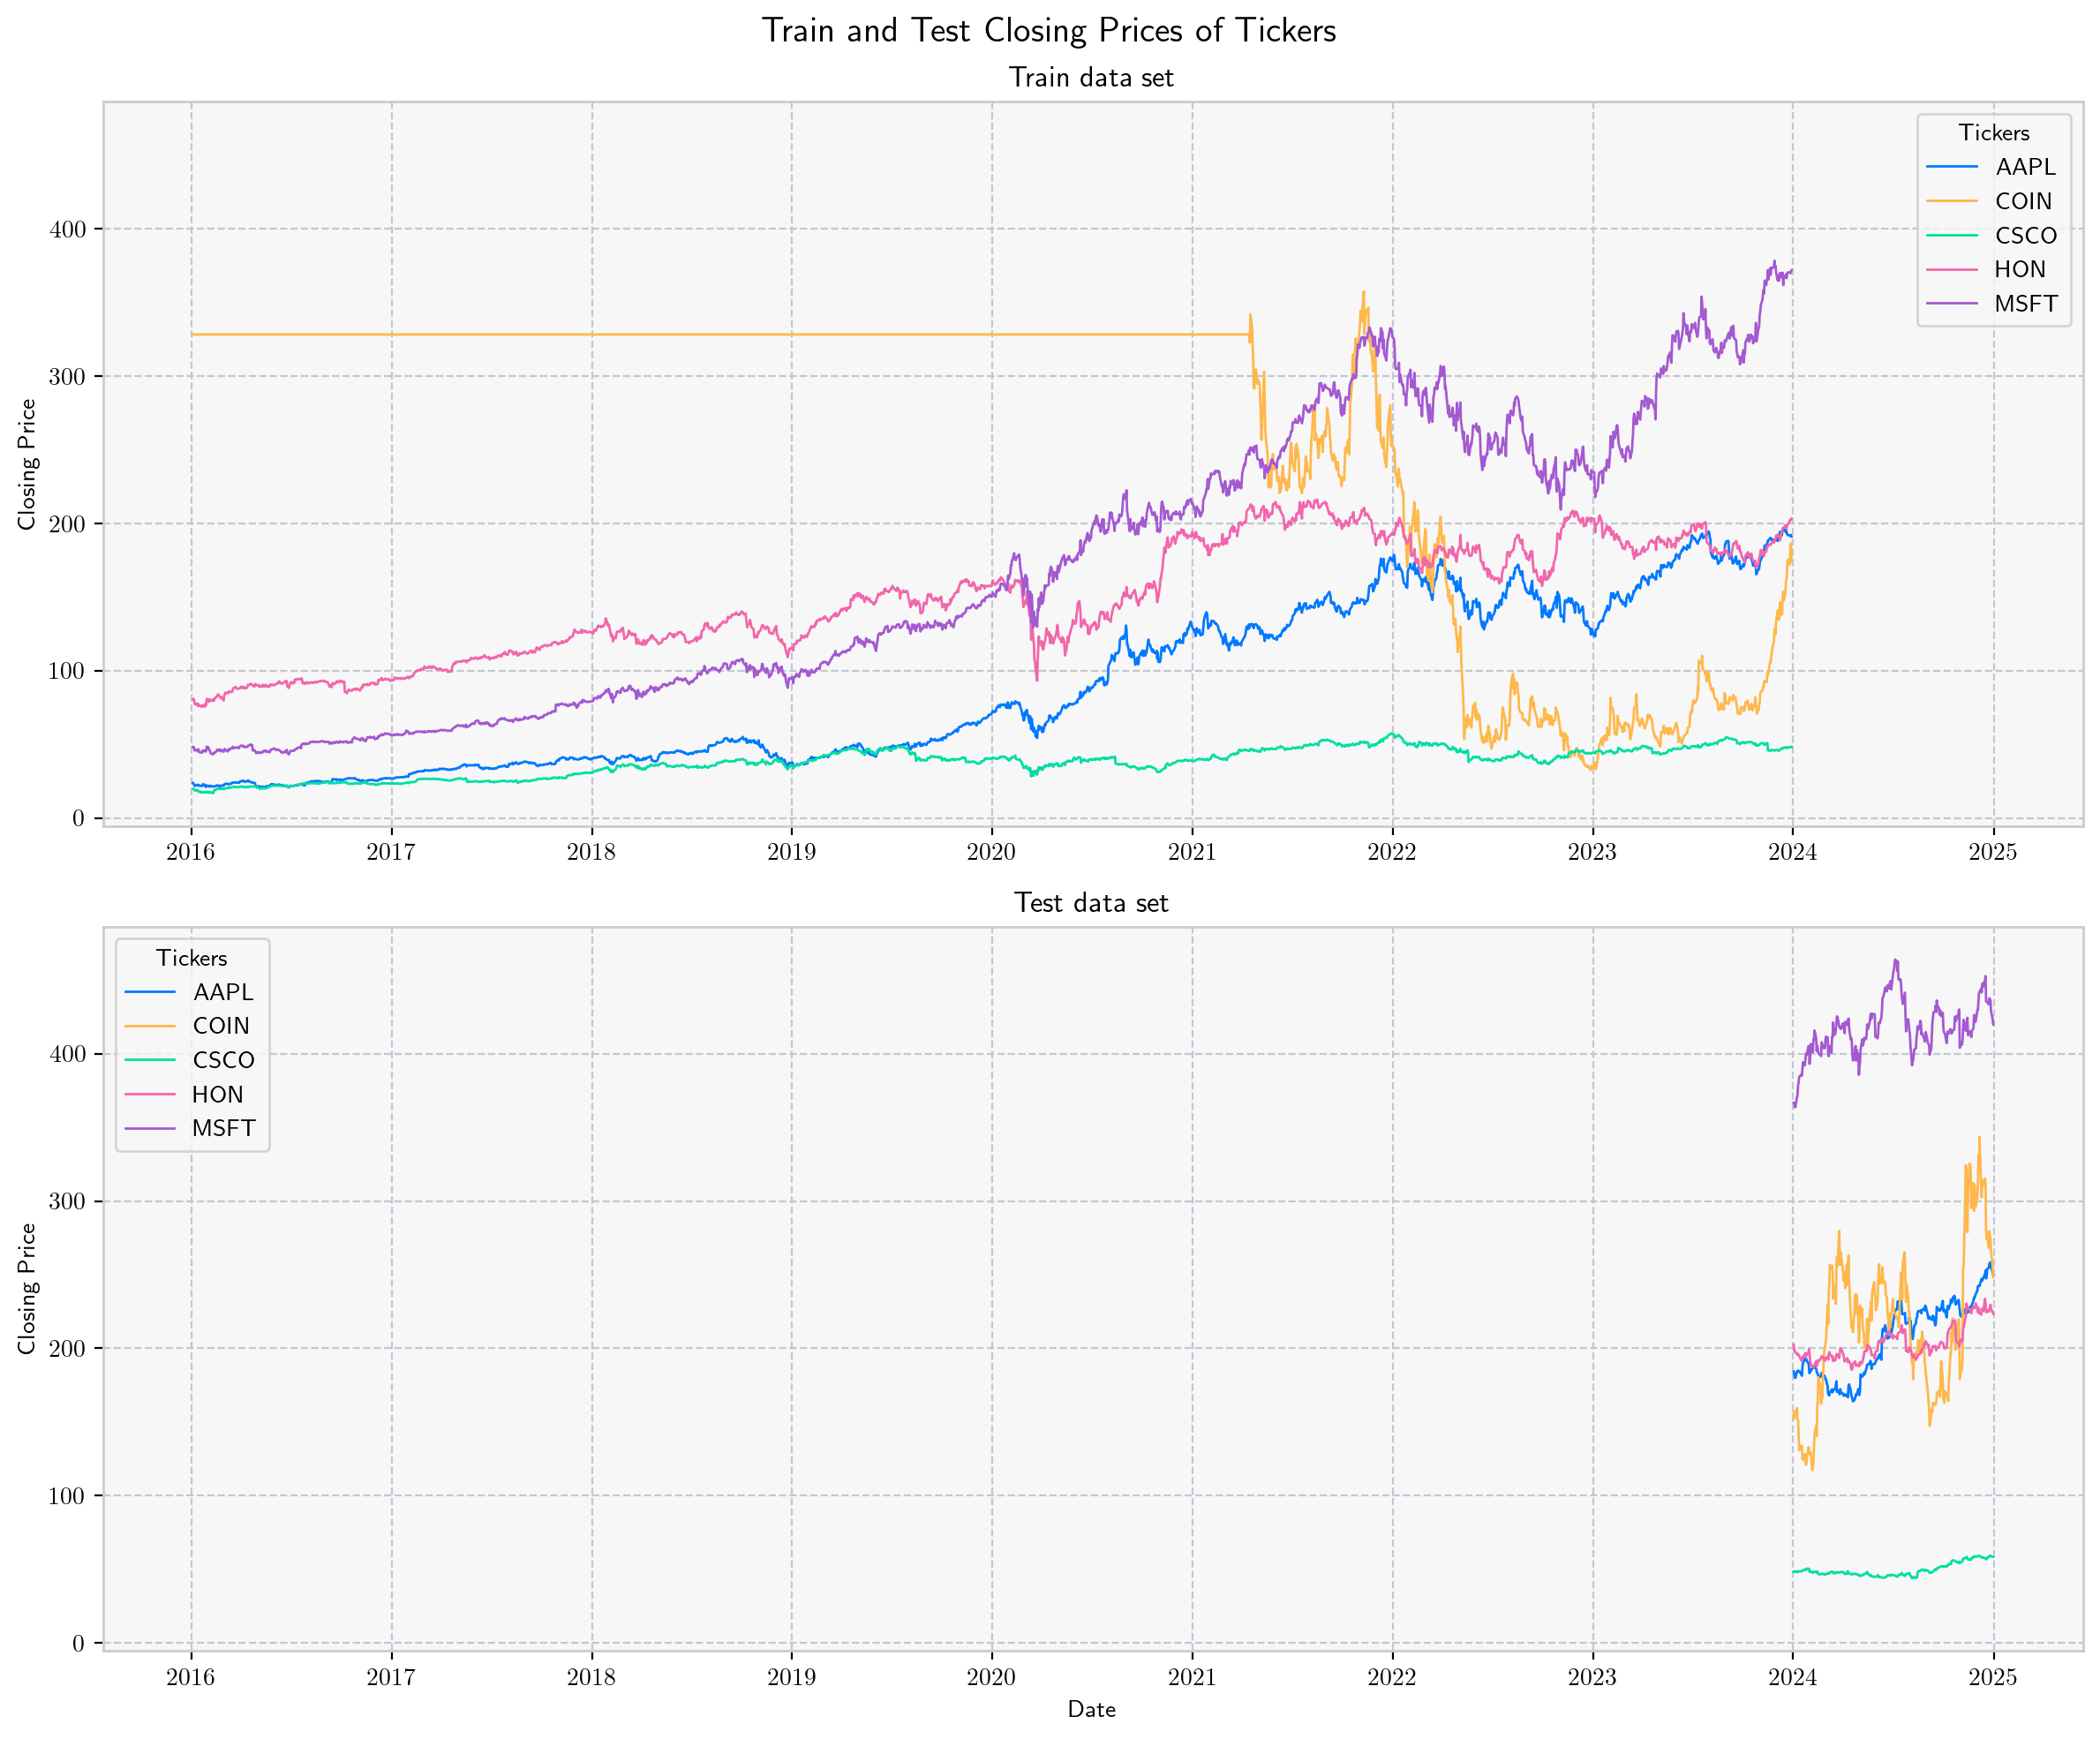

In [ ]:
finvisualiser.plot_train_test_close_prices(
    train_data, test_data, "../" + config.PLOT_DIR, config.TEST_NAME
)